# Matrix Methods Example - Frame 6
This is the same frame as used in the [main code file](Frame2D-v03.ipynb).

In [1]:
import nbformat

In [2]:
from __future__ import division, print_function
from IPython import display
import salib.nbloader    # so that we can directly import other notebooks

In [3]:
import Frame2D_v03 as f2d

![Test Frame 1](frame-6.d/frame-6.svg)

In [4]:
frame = f2d.Frame2D()
frame.read_data('frame-6')
frame.doall()


ndof = 12, nfree = 7, nconstraints = 5



Nodes:

Node          X         Y  Constraints  DOF #s
----      -----     -----  -----------  ------
A             0         0  FX,FY,MZ     8,7,9
B             0      4000               1,0,2
C          8000      4000               4,3,5
D          8000         0  FX,FY        11,10,6



Members:

Member   Node-J  Node-K    Length       dcx       dcy  Size                Ix           A  Releases
------   ------  ------    ------   -------   -------  --------      --------       -----  --------
AB       A       B         4000.0   0.00000   1.00000  W310x97       2.22e+08       12300  
BC       B       C         8000.0   1.00000   0.00000  W460x106      4.88e+08       13500  
DC       D       C         4000.0   0.00000   1.00000                2.22e+08       12300  



Node Loads:

Node  Dirn     Load
----  ----    -----
B     FX    -200000

Member Loads:

Member  Load
------  ----------------
BC      UDL(L=8000.0,W1=-50)
BC      PL(L=8000.0,W

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

def vm(self,loads,mefs=None):
    """Return shear and moment 'diagrams'.  Return (xv,v,xm,m) -
    xv and xm are positions along span, and v and m are shears and
    moments at those points.  Use normal sign convention (not beam sign 
    convention) - on left FBD, moments +ive CCW, shear +ive upwards.
    """
    def _getx(self,loads,attr):
        degree = 0
        pts = [0.,self.L]
        for load in loads:
            pt1,pt2,d = getattr(load,attr)
            for p in pt1,pt2:
                if p is not None:
                    pts.append(p)
            if d > degree:
                degree = d
        ptsv = np.array(pts)
        if degree > 1:
            ptsv = np.concatenate((ptsv,np.linspace(0,self.L)))
        ptsv.sort()
        return np.unique(ptsv)

    if mefs is None:
        mefs = self.mefs
    ##print(mefs)

    xv = _getx(self,loads,'vpts')
    xm = _getx(self,loads,'mpts')
    v = xv * 0. - mefs[1,0]
    m = xm * mefs[1,0] - mefs[2,0]
    for load in loads:
        v += load.shear(xv)
        m += load.moment(xm)
    return xv,v,xm,m

In [6]:
memb = 'BC'
m = frame.members[memb]
l = frame.membloads[memb]
xv,v,xm,m = vm(m,l)

In [7]:
display(xv,-v*1e-3)

array([    0.      ,  4999.999999,  5000.000001,  8000.      ])

array([ 321.301686,   71.301686, -128.698314, -278.698314])

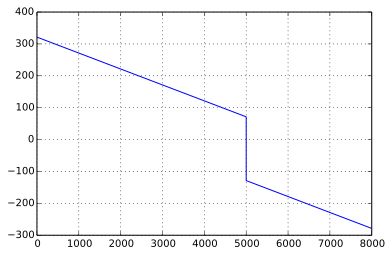

In [8]:
plt.grid(True)
plt.plot(xv,-v*1e-3)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


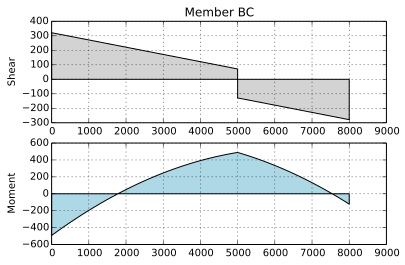

In [9]:
plt.subplot(2,1,1)
plt.title('Member {}'.format(memb))
plt.grid(True)
plt.fill_between(x=xv,y1=-v*1e-3,color='lightgray',edgecolor='black')
plt.ylabel('Shear')
plt.subplot(2,1,2)
plt.grid(True)
plt.fill_between(xm,m*1e-6,color='lightblue',edgecolor='black')
plt.ylabel('Moment')
None